# Project 2: Initial Exploration and Data Visualization
*University of Ljubljana, Faculty for computer and information science* <br />
*Course: Introduction to data science*

>To be able to run the code below, we first need to create a new environment from the **project_2_environment.yml** file. That environment would contain all the necessary packages to execute the code in this notebook.

In [1]:
# LIBRARIES
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import warnings
import datetime as dt

warnings.filterwarnings('ignore')

In [2]:
# FUNCTIONS
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

>Before running the next cell, the folder *Celtra example datasets (shared externally).zip* should be downloaded from the following link: https://drive.google.com/file/d/18rVfAmCZ5TmGLXSqlSzEvIGDFrTa44VC/view and unzipped into this folder containing the notebook *data_exploration.ipynb*.

In [3]:
usage_data = pd.read_csv('.\\Celtra example datasets (shared externally)\\Celtra platform usage data.csv',
                         parse_dates=['TIMESTAMP'])

In [4]:
usage_data = usage_data.sort_values(by='TIMESTAMP', ascending=True)

In [43]:
usage_data.head(5)

,ACCOUNT,USER,SESSION,ACTIVITYLOCATION,ACTIVITY,TIMESTAMP
5912,9df97d11af95d9dbc708ae5a77c4db24,cf413a4e79bbf803a0dbd9624be6c059,8afb4d5befbff56c324d6519cbf1bbe8,campaignCreatives,campaign managing,2020-07-01 00:00:02.305
312262,9df97d11af95d9dbc708ae5a77c4db24,cf413a4e79bbf803a0dbd9624be6c059,8afb4d5befbff56c324d6519cbf1bbe8,campaignCreatives,campaign managing,2020-07-01 00:00:07.299
215972,9df97d11af95d9dbc708ae5a77c4db24,cf413a4e79bbf803a0dbd9624be6c059,8afb4d5befbff56c324d6519cbf1bbe8,campaignCreatives,campaign managing,2020-07-01 00:00:12.295
83134,9df97d11af95d9dbc708ae5a77c4db24,cf413a4e79bbf803a0dbd9624be6c059,254829ea41fcb7c7234ef9a4a62e5efe,creativeExport,distributing,2020-07-01 00:00:16.038
312255,9df97d11af95d9dbc708ae5a77c4db24,cf413a4e79bbf803a0dbd9624be6c059,8afb4d5befbff56c324d6519cbf1bbe8,campaignCreatives,campaign managing,2020-07-01 00:00:17.295


In [21]:
usage_data.dtypes

ACCOUNT                     object
USER                        object
SESSION                     object
ACTIVITYLOCATION            object
ACTIVITY                    object
TIMESTAMP           datetime64[ns]
dtype: object

In [14]:
len(list(usage_data['ACCOUNT'].loc[0])), len(list(usage_data['USER'].loc[0])), len(list(usage_data['SESSION'].loc[0]))

(32, 32, 32)

### Values in categories 'Account', 'User' and 'Session' are all stored in a 32 character (alphanumeric) format.

In [42]:
usage_data['TIMESTAMP'].dt.month.unique()

array([7, 8, 9], dtype=int64)

### General statistics about the first dataset

In [64]:
usage_data.describe()

,ACCOUNT,USER,SESSION,ACTIVITYLOCATION,ACTIVITY,TIMESTAMP
count,622078,622078,622078,622078,622078,622078
unique,11,266,62693,48,10,541547
top,9df97d11af95d9dbc708ae5a77c4db24,(anonymous),1af3f4f7d48ea2b7797156003fd61325,adBuilder,using Ad Builder passivelly,2020-09-14 18:34:16.235000
freq,280228,107054,1838,278593,278593,6
first,NaN,NaN,NaN,NaN,NaN,2020-07-01 00:00:02.305000
last,NaN,NaN,NaN,NaN,NaN,2020-09-29 23:47:39.301000


In [65]:
(usage_data.isna()).sum().sum()

0

In [66]:
usage_data['TIMESTAMP'].dt.date.nunique()

90

### Checking the types of activities done by every separate Account ID

In [5]:
account_dict = {}
accounts = usage_data['ACCOUNT'].unique()
for account in accounts:
    tmp_df = usage_data.loc[usage_data.ACCOUNT == account]
    account_dict[account] = tmp_df['ACTIVITY'].unique()
    account_dict[account].sort()

account_dict

In [7]:
activities = []
for key in account_dict.keys():
    for activity in account_dict[key]:
        if activity not in activities:
            activities.append(activity)
            
activities

### DataFrame showing what activities were done by every separate Account ID

In [9]:
activity_df = pd.DataFrame()
for key in account_dict:
    tmp_list = []
    for activity in activities:
        if activity in account_dict[key]:
            tmp_list.append(True)
        else:
            tmp_list.append(False)
    tmp_df = pd.DataFrame({key: tmp_list}, index=activities)
    activity_df = pd.concat([activity_df, tmp_df], axis=1)

In [10]:
activity_df

,9df97d11af95d9dbc708ae5a77c4db24,7987ab2588c8a8a092088fe1e270eaea,9481f5ef6a333fe0ad4582790e456875,b556f8d7a889038878402eed730fd54e,ec4ee625edb37b5e628f487c59ecb6e1,ffa6bfe68b18766d41e1b78a7f0904c7,fdc66a33c7576bb859a751b42cd23552,ee1007298840fccd45037a1ad5e400b5,e2723e3632ebbba2d37d9bfc505e9987,afa3101de4cb6dbd43435a95cc8acc45,683a7e0f1bc8611d8f7fdac0e37346b6
account/user managing,True,True,True,True,True,True,True,True,False,True,True
campaign managing,True,True,True,True,True,True,True,True,True,True,True
distributing,True,True,True,True,True,True,True,True,True,True,True
generating/updating/previewing batches,True,True,True,True,True,True,True,True,True,True,True
producing creatives/templates,True,True,True,True,True,True,True,True,True,True,True
providing/producing content,True,True,True,True,True,True,True,True,True,True,True
reviewing,True,True,True,True,True,True,True,True,True,True,True
using Ad Builder passivelly,True,True,True,True,True,True,True,True,True,True,True
socialLinkDialog,False,True,True,True,False,False,True,False,False,False,False
distributionPage/editFacebookAdSetDestinationDialog,False,False,True,True,False,False,False,False,False,False,False


## Calculation of time (seconds) spent on a particular type of activity in every company

In [11]:
act_time_dict = {}
for account in accounts:
    act_time_dict[account] = {}
    for activity in activities:
        act_time_dict[account][activity] = []
    tmp_df = usage_data.loc[usage_data.ACCOUNT == account][['ACCOUNT', 'ACTIVITY', 'TIMESTAMP']].reset_index(drop=True)
    new_activity = tmp_df.loc[0]['ACTIVITY']
    new_tmstp = tmp_df.loc[0]['TIMESTAMP']
    for i in range(1, len(tmp_df.index)):
        old_activity, old_tmstp = new_activity, new_tmstp
        new_activity = tmp_df.loc[i]['ACTIVITY']
        if old_activity != new_activity:
            new_tmstp = tmp_df.loc[i]['TIMESTAMP']
            act_time_dict[account][old_activity].append((new_tmstp - old_tmstp).total_seconds())

In [12]:
for key in act_time_dict.keys():
    tmp_dict = act_time_dict[key]
    for activity in tmp_dict.keys():
        for time in tmp_dict[activity]:
                if time > 7200:      # time interval longer than 2 hours
                    act_time_dict[key][activity].remove(time)
        act_time_dict[key][activity] = np.round(np.array(act_time_dict[key][activity]).sum(), 3)

In [13]:
act_time_df = pd.DataFrame(act_time_dict)
act_time_df

,9df97d11af95d9dbc708ae5a77c4db24,7987ab2588c8a8a092088fe1e270eaea,9481f5ef6a333fe0ad4582790e456875,b556f8d7a889038878402eed730fd54e,ec4ee625edb37b5e628f487c59ecb6e1,ffa6bfe68b18766d41e1b78a7f0904c7,fdc66a33c7576bb859a751b42cd23552,ee1007298840fccd45037a1ad5e400b5,e2723e3632ebbba2d37d9bfc505e9987,afa3101de4cb6dbd43435a95cc8acc45,683a7e0f1bc8611d8f7fdac0e37346b6
account/user managing,3409.568,13864.030,3389.088,23190.838,4519.182,373.794,108320.722,7775.112,0.000,47.438,332.459
campaign managing,100754.645,220702.508,392942.346,81050.274,38100.645,215792.497,303216.127,101398.371,248509.364,23766.977,23325.542
distributing,52641.185,65814.431,70509.675,69267.354,19514.587,4514.066,23474.801,37162.610,158006.362,96238.133,4.993
generating/updating/previewing batches,130235.525,75936.588,203683.244,34401.758,71396.071,2164.264,44555.839,131154.707,10465.621,24123.087,25842.879
producing creatives/templates,13716.378,1590.110,3744.739,497.861,5598.173,441.434,732.341,438.274,1936.976,55.054,350.033
providing/producing content,176523.483,5590.827,46282.611,13494.707,17199.945,143.388,35185.999,15275.550,45344.063,148781.807,14682.854
reviewing,1720003.524,1666182.595,1119416.099,1568988.448,1346418.786,146834.905,168899.878,864961.487,50337.770,144721.673,43693.969
using Ad Builder passivelly,479687.383,607905.891,314607.174,841098.916,190469.965,361376.010,193389.118,198982.621,218851.888,891704.270,210774.153
socialLinkDialog,0.000,0.000,11933.381,4866.400,0.000,0.000,1223.646,0.000,0.000,0.000,0.000
distributionPage/editFacebookAdSetDestinationDialog,0.000,0.000,72.406,10.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [78]:
# Calculation of time spent on 'Reviewing'
review_df = act_time_df.loc['reviewing'] / act_time_df.sum()
review_df

9df97d11af95d9dbc708ae5a77c4db24    0.642518
7987ab2588c8a8a092088fe1e270eaea    0.626953
9481f5ef6a333fe0ad4582790e456875    0.516674
b556f8d7a889038878402eed730fd54e    0.595020
ec4ee625edb37b5e628f487c59ecb6e1    0.795184
ffa6bfe68b18766d41e1b78a7f0904c7    0.200693
fdc66a33c7576bb859a751b42cd23552    0.192150
ee1007298840fccd45037a1ad5e400b5    0.637337
e2723e3632ebbba2d37d9bfc505e9987    0.068631
afa3101de4cb6dbd43435a95cc8acc45    0.108859
683a7e0f1bc8611d8f7fdac0e37346b6    0.136969
dtype: float64

### The first 5 companies by time spent on Celtra's platform have all spent most of their time on the activity *Reviewing*.

In [15]:
cum_time_df = act_time_df.sum().sort_values(ascending=False)
cum_time_df

9df97d11af95d9dbc708ae5a77c4db24    2676971.691
7987ab2588c8a8a092088fe1e270eaea    2657586.980
b556f8d7a889038878402eed730fd54e    2636866.557
9481f5ef6a333fe0ad4582790e456875    2166580.763
ec4ee625edb37b5e628f487c59ecb6e1    1693217.354
ee1007298840fccd45037a1ad5e400b5    1357148.732
afa3101de4cb6dbd43435a95cc8acc45    1329438.439
fdc66a33c7576bb859a751b42cd23552     878998.471
e2723e3632ebbba2d37d9bfc505e9987     733452.044
ffa6bfe68b18766d41e1b78a7f0904c7     731640.358
683a7e0f1bc8611d8f7fdac0e37346b6     319006.882
dtype: float64

In [16]:
# Calculation of time spent on 'campaign managing', 'reviewing', 'using Ad Builder passively'
sel_act_df = act_time_df.loc[['campaign managing', 'reviewing', 'using Ad Builder passivelly']].sum() / act_time_df.sum()
sel_act_df

9df97d11af95d9dbc708ae5a77c4db24    0.859346
7987ab2588c8a8a092088fe1e270eaea    0.938743
9481f5ef6a333fe0ad4582790e456875    0.843248
b556f8d7a889038878402eed730fd54e    0.944734
ec4ee625edb37b5e628f487c59ecb6e1    0.930176
ffa6bfe68b18766d41e1b78a7f0904c7    0.989562
fdc66a33c7576bb859a751b42cd23552    0.757117
ee1007298840fccd45037a1ad5e400b5    0.858670
e2723e3632ebbba2d37d9bfc505e9987    0.705839
afa3101de4cb6dbd43435a95cc8acc45    0.797474
683a7e0f1bc8611d8f7fdac0e37346b6    0.870808
dtype: float64

In [21]:
sel_act_2 = []
for account in cum_time_df.index:
    sel_act_2.append(sel_act_df.loc[account])
sel_act_2 = pd.Series(sel_act_2, index=cum_time_df.index)

9df97d11af95d9dbc708ae5a77c4db24    0.859346
7987ab2588c8a8a092088fe1e270eaea    0.938743
b556f8d7a889038878402eed730fd54e    0.944734
9481f5ef6a333fe0ad4582790e456875    0.843248
ec4ee625edb37b5e628f487c59ecb6e1    0.930176
ee1007298840fccd45037a1ad5e400b5    0.858670
afa3101de4cb6dbd43435a95cc8acc45    0.797474
fdc66a33c7576bb859a751b42cd23552    0.757117
e2723e3632ebbba2d37d9bfc505e9987    0.705839
ffa6bfe68b18766d41e1b78a7f0904c7    0.989562
683a7e0f1bc8611d8f7fdac0e37346b6    0.870808
dtype: float64

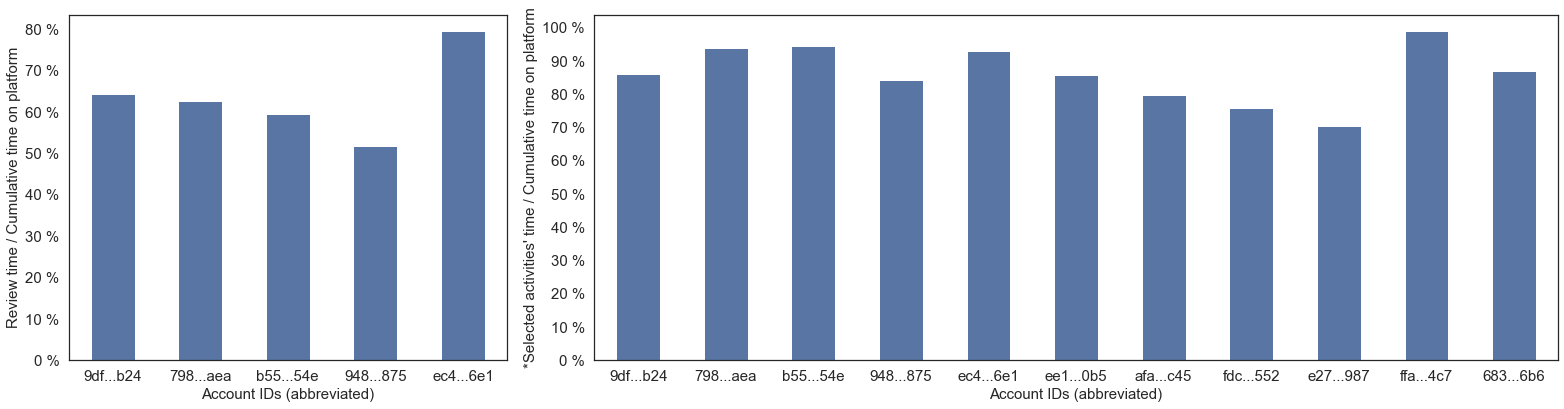

In [43]:
account_abbr = []
for account in cum_time_df.index:
    account_abbr.append(account[: 3] + '...' + account[-3:])
sns.set_theme(style='white')  
fig = plt.figure(figsize=(22, 6))
gs = fig.add_gridspec(1,3)
ax = (fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:]))
for (i, axis) in enumerate(ax):
    if i == 0:
        y_ticks = np.arange(0, 81, 10)
        sns.barplot(x=account_abbr[: 5], y=review_df.loc[cum_time_df.index[: 5]], ax=axis, color=sns.color_palette()[0]) 
        axis.set_xlabel('Account IDs (abbreviated)', fontsize=15)
        axis.set_ylabel('Review time / Cumulative time on platform', fontsize=15)  
        axis.set_xticklabels(labels=account_abbr[: 5], fontsize=15)
        axis.set_yticklabels([(str(val) + ' %') for val in y_ticks], fontsize=15)
        change_width(axis, 0.5);
    else:
        y_ticks = []
        for i in range(0, 11):
            y_ticks.append(i / 10)
        y_ticks = np.array(y_ticks)
        sns.barplot(x=account_abbr, y=sel_act_2, ax=axis, color=sns.color_palette()[0]) 
        axis.set_xlabel('Account IDs (abbreviated)', fontsize=15)
        axis.set_ylabel("*Selected activities' time / Cumulative time on platform", fontsize=15) 
        axis.set_yticks(y_ticks)
        y_ticks = range(0, 101, 10)
        axis.set_xticklabels(labels=account_abbr, fontsize=15)
        axis.set_yticklabels(labels=[(str(val) + ' %') for val in y_ticks], fontsize=15)
        change_width(axis, 0.5);

plt.gcf().subplots_adjust(left=0.05, right=0.99, top=0.95, bottom=0.15, hspace=0.2)
#plt.savefig('activities_time.pdf', format='pdf')

## Activities ordered by time spent on them in particular company (descending order)

In [121]:
act_time_df_copy = act_time_df.copy(deep=True)
act_time_df = pd.DataFrame()
for col in act_time_df_copy.columns:
    tmp_df = act_time_df_copy[col].sort_values(ascending=False)
    act_time_df = pd.concat([act_time_df, pd.DataFrame({col:tmp_df.index}, index=range(len(tmp_df.index)))], axis=1)

In [122]:
act_time_df

,9df97d11af95d9dbc708ae5a77c4db24,7987ab2588c8a8a092088fe1e270eaea,9481f5ef6a333fe0ad4582790e456875,b556f8d7a889038878402eed730fd54e,ec4ee625edb37b5e628f487c59ecb6e1,ffa6bfe68b18766d41e1b78a7f0904c7,fdc66a33c7576bb859a751b42cd23552,ee1007298840fccd45037a1ad5e400b5,e2723e3632ebbba2d37d9bfc505e9987,afa3101de4cb6dbd43435a95cc8acc45,683a7e0f1bc8611d8f7fdac0e37346b6
0,reviewing,reviewing,reviewing,reviewing,reviewing,using Ad Builder passivelly,campaign managing,reviewing,campaign managing,using Ad Builder passivelly,using Ad Builder passivelly
1,using Ad Builder passivelly,using Ad Builder passivelly,campaign managing,using Ad Builder passivelly,using Ad Builder passivelly,campaign managing,using Ad Builder passivelly,using Ad Builder passivelly,using Ad Builder passivelly,providing/producing content,reviewing
2,providing/producing content,campaign managing,using Ad Builder passivelly,campaign managing,generating/updating/previewing batches,reviewing,reviewing,generating/updating/previewing batches,distributing,reviewing,generating/updating/previewing batches
3,generating/updating/previewing batches,generating/updating/previewing batches,generating/updating/previewing batches,distributing,campaign managing,distributing,account/user managing,campaign managing,reviewing,distributing,campaign managing
4,campaign managing,distributing,distributing,generating/updating/previewing batches,distributing,generating/updating/previewing batches,generating/updating/previewing batches,distributing,providing/producing content,generating/updating/previewing batches,providing/producing content
5,distributing,account/user managing,providing/producing content,account/user managing,providing/producing content,producing creatives/templates,providing/producing content,providing/producing content,generating/updating/previewing batches,campaign managing,producing creatives/templates
6,producing creatives/templates,providing/producing content,socialLinkDialog,providing/producing content,producing creatives/templates,account/user managing,distributing,account/user managing,producing creatives/templates,producing creatives/templates,account/user managing
7,account/user managing,producing creatives/templates,producing creatives/templates,socialLinkDialog,account/user managing,providing/producing content,socialLinkDialog,producing creatives/templates,distributionPage/editFacebookAdSetDestinationD...,account/user managing,distributing
8,distributionPage/editFacebookAdSetDestinationD...,distributionPage/editFacebookAdSetDestinationD...,account/user managing,producing creatives/templates,distributionPage/editFacebookAdSetDestinationD...,distributionPage/editFacebookAdSetDestinationD...,producing creatives/templates,distributionPage/editFacebookAdSetDestinationD...,socialLinkDialog,distributionPage/editFacebookAdSetDestinationD...,distributionPage/editFacebookAdSetDestinationD...
9,socialLinkDialog,socialLinkDialog,distributionPage/editFacebookAdSetDestinationD...,distributionPage/editFacebookAdSetDestinationD...,socialLinkDialog,socialLinkDialog,distributionPage/editFacebookAdSetDestinationD...,socialLinkDialog,account/user managing,socialLinkDialog,socialLinkDialog


### Celtra could focus on maintaining (further improving) the 'Reviewing' part of the platform, as that's the one which is most used by the companies spending most time on Celtra's platform.

## Sessions data.csv

In [44]:
sessions_data = pd.read_csv('.\\Celtra example datasets (shared externally)\\Celtra sessions data.csv',
                            parse_dates=['UTCDATE', 'ACCOUNTCREATIONDATE', 'CAMPAIGNCREATIONDATE', 'CREATIVECREATIONDATE'])

In [132]:
(sessions_data.isna()).sum().sum()

0

In [129]:
len(sessions_data.index)

4823186

In [16]:
sessions_data.head()

,UTCDATE,ACCOUNTID,ACCOUNTCREATIONDATE,CAMPAIGNID,CAMPAIGNCREATIONDATE,CREATIVEID,CREATIVECREATIONDATE,PLATFORM,SDK,REQUESTEDSESSIONS,LOADEDSESSIONS,RENDEREDSESSIONS,SESSIONSWITHINTERACTION,VIEWABLETIME,CREATIVELOADATTEMPTS
0,2018-01-01,6340835793860707872,2013-09-05 14:27:13.000,-3494773834525559494,2017-03-01 15:27:49.000,12478290410483568,2017-03-01 15:32:58.000,Android,MobileWeb,7,5,5,0,23,7
1,2018-01-01,-3038031771419903297,2012-12-05 10:03:43.000,5485378998304268448,2017-11-10 11:28:17.000,690098116024760877,2017-11-15 14:00:24.000,DesktopPlatform,MRAID,1,1,1,0,1,1
2,2018-01-01,-3038031771419903297,2012-12-05 10:03:43.000,5485378998304268448,2017-11-10 11:28:17.000,-2600564554404124594,2017-12-04 06:36:00.000,Android,MRAID,653,591,460,1,5575,653
3,2018-01-01,-3038031771419903297,2012-12-05 10:03:43.000,-5062053752656366863,2017-12-01 14:09:43.000,-8073003132403577258,2017-12-07 14:38:49.000,Android,MRAID,1,0,0,0,0,1
4,2018-01-01,8447339450952725126,2013-06-18 08:39:53.000,3576384301902184893,2017-10-18 10:19:32.000,-3013790246984068713,2017-11-08 15:02:52.000,DesktopPlatform,MobileWeb,9,9,8,0,240,9


In [128]:
sessions_data['UTCDATE'].min(), sessions_data['UTCDATE'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [26]:
sessions_data.dtypes

UTCDATE                    datetime64[ns]
ACCOUNTID                           int64
ACCOUNTCREATIONDATE        datetime64[ns]
CAMPAIGNID                          int64
CAMPAIGNCREATIONDATE       datetime64[ns]
CREATIVEID                          int64
CREATIVECREATIONDATE       datetime64[ns]
PLATFORM                           object
SDK                                object
REQUESTEDSESSIONS                   int64
LOADEDSESSIONS                      int64
RENDEREDSESSIONS                    int64
SESSIONSWITHINTERACTION             int64
VIEWABLETIME                        int64
CREATIVELOADATTEMPTS                int64
dtype: object

### Categories AccountID, CampaignID and CreativeID are represented by 64-bit signed integers.

In [17]:
sessions_data['ACCOUNTID'].nunique()

317

### Sessions analysis: the progression from Requested sessions all the way to Sessions with interaction

In [45]:
platforms = sessions_data['PLATFORM'].unique()
cols_of_interest = ['REQUESTEDSESSIONS', 'LOADEDSESSIONS', 'RENDEREDSESSIONS', 'SESSIONSWITHINTERACTION']
sessions_dict = {}
for platform in platforms:
    tmp_platform = sessions_data.loc[sessions_data.PLATFORM == platform]
    sessions_dict[platform] = {}
    for col in cols_of_interest:
        sessions_dict[platform][col] = tmp_platform[col].values.sum()    

sessions_dict

In [47]:
sessions_df = pd.DataFrame(sessions_dict)

In [48]:
sessions_df

,Android,DesktopPlatform,IOS,WindowsPhone,BlackBerry,WebOS
REQUESTEDSESSIONS,5185691626,964924429,3292163845,3872867,269166,12598
LOADEDSESSIONS,3775260501,788519334,2594391322,2354198,176301,7112
RENDEREDSESSIONS,2771762034,667153019,2077567483,1788032,142246,5735
SESSIONSWITHINTERACTION,70795462,5313195,35115997,75044,5897,23


### Percentage of sessions requested on the platforms Android, DesktopPlatform and iOS

In [49]:
sessions_df[['Android', 'DesktopPlatform', 'IOS']].loc['REQUESTEDSESSIONS'].sum() / sessions_df.loc['REQUESTEDSESSIONS'].sum()

0.9995602138464741

In [59]:
rel_sessions_df = pd.DataFrame()
for platform in platforms:
    tmp_df = sessions_df[platform]
    tmp_df = tmp_df / tmp_df.max()
    rel_sessions_df = pd.concat([rel_sessions_df, tmp_df], axis=1)

In [53]:
rel_sessions_df

,Android,DesktopPlatform,IOS,WindowsPhone,BlackBerry,WebOS
REQUESTEDSESSIONS,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
LOADEDSESSIONS,0.728015,0.817182,0.788050,0.607870,0.654990,0.564534
RENDEREDSESSIONS,0.534502,0.691404,0.631064,0.461682,0.528469,0.455231
SESSIONSWITHINTERACTION,0.013652,0.005506,0.010667,0.019377,0.021908,0.001826


In [60]:
rel_sess_index = ['Percentage of loaded sessions',
                  'Percentage of rendered sessions',
                  'Percentage of sessions with interaction']
rel_sessions_df = rel_sessions_df.iloc[1:, : 3].round(3) * 100
rel_sessions_df.index = rel_sess_index
rel_sessions_df

,Android,DesktopPlatform,IOS
Percentage of loaded sessions,72.8,81.7,78.8
Percentage of rendered sessions,53.5,69.1,63.1
Percentage of sessions with interaction,1.4,0.6,1.1


In [61]:
#rel_sessions_df.to_csv('relative_percentages.csv')

## Analysis of the attribute "Viewable time"

In [82]:
no_interaction = np.array([0])
interaction = np.array([0, 0, 0, 0, 0])
intervals = np.array([0, 5, 10, 60, 300])
index = ['= 0s', '> 0s', '> 5s', '> 10s', '> 60s', '> 300s']
interaction_df = pd.DataFrame(index=index)
for platform in ['Android', 'DesktopPlatform', 'IOS']:
    tmp_df = sessions_data.loc[sessions_data.PLATFORM == platform][['VIEWABLETIME', 'REQUESTEDSESSIONS']]
    tmp_arr = tmp_df['VIEWABLETIME'].values
    for el in tmp_arr:
        no_interaction = no_interaction + (el == 0)
        interaction = interaction + (el > intervals)
    interaction_df = pd.concat([interaction_df, pd.DataFrame(np.hstack((no_interaction, interaction)) / tmp_df['REQUESTEDSESSIONS'].sum(), index=index)], axis=1)

interaction_df.columns = ['Android', 'DesktopPlatform', 'IOS']
interaction_df

,Android,DesktopPlatform,IOS
= 0s,0.000041,0.000620,0.000245
> 0s,0.000290,0.002378,0.001142
> 5s,0.000280,0.002254,0.001088
> 10s,0.000274,0.002182,0.001057
> 60s,0.000238,0.001641,0.000833
> 300s,0.000193,0.001226,0.000634


In [87]:
((interaction_df * 1e4).round(3)).to_csv('viewable_time.csv')

In [85]:
for platform in ['Android', 'DesktopPlatform', 'IOS']:
    print(sessions_data.loc[sessions_data.PLATFORM == platform][['VIEWABLETIME']].sum())

VIEWABLETIME    28522783393
dtype: int64
VIEWABLETIME    4765174187
dtype: int64
VIEWABLETIME    25004498587
dtype: int64


### Requested sessions per platform

In [11]:
hbar_df = pd.DataFrame({'Platform': sessions_df.columns,
                        'Requested sessions': sessions_df.loc['REQUESTEDSESSIONS']})
hbar_df.index = range(len(sessions_df.columns))
hbar_df

,Platform,Requested sessions
0,Android,5185691626
1,DesktopPlatform,964924429
2,IOS,3292163845
3,WindowsPhone,3872867
4,BlackBerry,269166
5,WebOS,12598


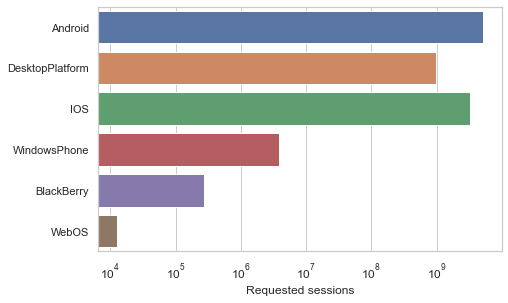

In [30]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(7, 4))
plt.gcf().subplots_adjust(left=0.20, right=1, top=1, bottom=0.15)
sns.barplot(x='Requested sessions', y='Platform', data=hbar_df, log=True)#, color=sns.color_palette()[0]);
plt.ylabel('')
plt.xticks(fontsize=12);
#plt.savefig('platforms.pdf', format='pdf')

**It is clear we can focus only on analyzing the platforms: Android, Desktop and iOS.**

### Table 1 in the report substituted by histograms for all platforms including ''BlackBerry", "WebOS" and "WindowsPhone"

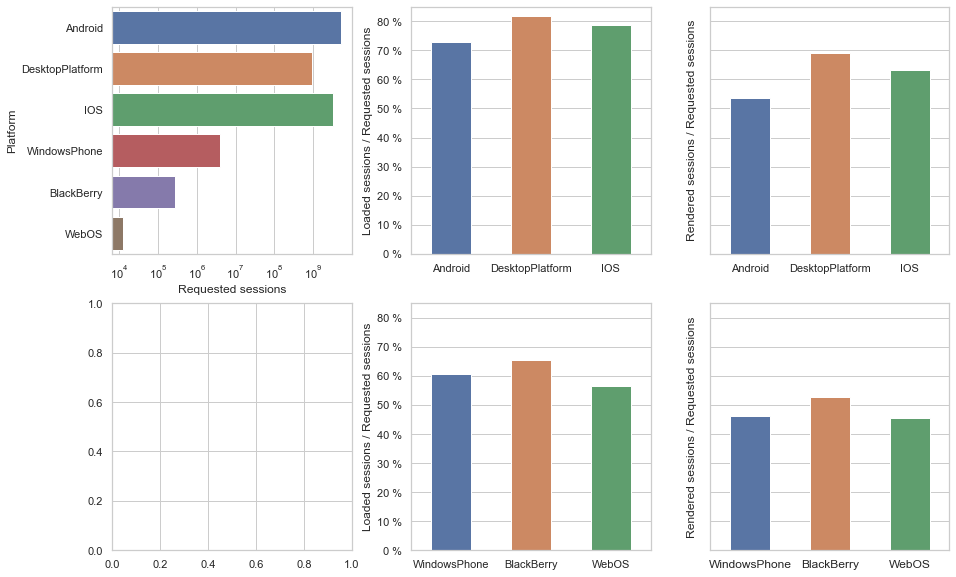

In [52]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.set_theme(style='whitegrid')
y_labels = ['Loaded sessions', 'Rendered sessions', 'Sessions with interaction']
y_ticks = np.arange(0, 81, 10)

hbar = sns.barplot(x='Requested sessions', y='Platform', data=hbar_df, log=True, ax=axes.reshape(-1)[0])#, color=sns.color_palette()[0]);
plt.xticks(fontsize=12)
# for ytick in hbar.get_yticklabels():
#     ytick.set_rotation(90)
    
for i, ax in enumerate(axes.reshape(-1)):
    if ((i == 1) or (i == 2)):
        selected_col = selected_df[selected_df.columns[i - 1]].values[:3]
        sns.barplot(x=selected_df.index[:3],
                    y=selected_col,
                    data=selected_df, 
                    ax=ax)
        ax.set_ylabel(y_labels[i - 1] + ' / Requested sessions', fontsize=12)
        ax.set_ylim(0, 85)
        if (i == 1):
            ax.set_yticklabels([(str(val) + ' %') for val in y_ticks])
        else:
            ax.set_yticklabels('')
        change_width(ax, 0.5)
    elif ((i == 4) or (i == 5)):
        selected_col = selected_df[selected_df.columns[i - 4]].values[3:]
        sns.barplot(x=selected_df.index[3:], 
                    y=selected_col,
                    data=selected_df,
                    ax=ax)
        ax.set_ylabel(y_labels[i - 4] + ' / Requested sessions', fontsize=12)
        ax.set_ylim(0, 85)
        if (i == 4):
            ax.set_yticklabels([(str(val) + ' %') for val in y_ticks])
        else:
            ax.set_yticklabels('')
        change_width(ax, 0.5)
        
plt.subplots_adjust(hspace=0.2, wspace=0.25)  